<a href="https://colab.research.google.com/github/funway/nid-imbalance-study/blob/main/classification/f_rf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RF (Random Forest) 随机森林

## Colab Env

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


## Modules import & Globals setup

In [ ]:
### Modules ###
import os
import numpy as np
import joblib

from pathlib import Path
from datetime import datetime
from collections import Counter


### Globals ###

## 数据目录
dataset = 'CSE-CIC-IDS2018'
datasets_folder = Path('/content/drive/MyDrive/NYIT/870/datasets')
preprocessed_folder = datasets_folder / 'preprocessed' / dataset
balanced_folder = datasets_folder / 'balanced' / dataset
results_folder = Path('/content/drive/MyDrive/NYIT/870/model_result') / dataset

In [ ]:
scaling_method = 'standard'
# scaling_method = 'l1pstandard'

resample_scheme = 1

oversampleing_method = 'ROS+cGAN'
undersampling_method = 'RUS'
classifier = 'RF'

if resample_scheme == 0:
    model_file = results_folder / f'{dataset}_{scaling_method}_s{resample_scheme}_{classifier}.pkl'
else:
    model_file = results_folder / f'{dataset}_{scaling_method}_s{resample_scheme}_{oversampleing_method}_{undersampling_method}_{classifier}.pkl'

In [ ]:
if resample_scheme == 0:
    file_X_train = preprocessed_folder / 'integrated' / f'train_X_{scaling_method}.npy'
    file_y_train = preprocessed_folder / 'integrated' / f'train_label_{scaling_method}.npy'
else:
    file_X_train = balanced_folder / f'train_X_{scaling_method}_s{resample_scheme}_{oversampleing_method}_{undersampling_method}.npy'
    file_y_train = balanced_folder / f'train_label_{scaling_method}_s{resample_scheme}_{oversampleing_method}_{undersampling_method}.npy'

file_X_valid = preprocessed_folder / 'integrated' / f'valid_X_{scaling_method}.npy'
file_y_valid = preprocessed_folder / 'integrated' / f'valid_label_{scaling_method}.npy'

file_X_test = preprocessed_folder / 'integrated' / f'test_X_{scaling_method}.npy'
file_y_test = preprocessed_folder / 'integrated' / f'test_label_{scaling_method}.npy'

print(f"[{datetime.now().strftime('%x %X')}] loading datasets...")
X_train = np.load(file_X_train)
y_train = np.load(file_y_train)
X_valid = np.load(file_X_valid)
y_valid = np.load(file_y_valid)
X_test = np.load(file_X_test)
y_test = np.load(file_y_test)

report_dataset = ''
report_dataset += f'\nTrain set: {file_X_train.name}, {file_y_train.name} \n'
report_dataset += f'    shape: {X_train.shape}, {y_train.shape} \n'
report_dataset += f"    labels: { {int(k): v for k, v in sorted(Counter(y_train).items())} } \n"
report_dataset += f'\n Valid set: {file_X_valid.name}, {file_y_valid.name} \n'
report_dataset += f'    shape: {X_valid.shape}, {y_valid.shape} \n'
report_dataset += f"    labels: { {int(k): v for k, v in sorted(Counter(y_valid).items())} } \n"
report_dataset += f'\n Test set: {file_X_test.name}, {file_y_test.name} \n'
report_dataset += f'    shape: {X_test.shape}, {y_test.shape} \n'
report_dataset += f"    labels: { {int(k): v for k, v in sorted(Counter(y_test).items())} } \n"

print(report_dataset)

[04/20/25 20:35:49] loading datasets...

Train set: train_X_standard_s1_ROS+cGAN_RUS.npy, train_label_standard_s1_ROS+cGAN_RUS.npy 
    shape: (3175177, 70), (3175177,) 
    labels: {0: 1600000, 1: 200000, 2: 20000, 3: 20000, 4: 200000, 5: 20000, 6: 200000, 7: 100000, 8: 200000, 9: 111912, 10: 50000, 11: 154683, 12: 128511, 13: 20000, 14: 150071} 

 Valid set: valid_X_standard.npy, valid_label_standard.npy 
    shape: (474693, 70), (474693,) 
    labels: {0: 200000, 1: 28619, 2: 61, 3: 23, 4: 68601, 5: 173, 6: 57619, 7: 4151, 8: 46191, 9: 13989, 10: 1099, 11: 19335, 12: 16064, 13: 9, 14: 18759} 

 Test set: test_X_standard.npy, test_label_standard.npy 
    shape: (474694, 70), (474694,) 
    labels: {0: 200000, 1: 28619, 2: 61, 3: 23, 4: 68602, 5: 173, 6: 57619, 7: 4151, 8: 46191, 9: 13989, 10: 1099, 11: 19336, 12: 16064, 13: 8, 14: 18759} 



In [ ]:
## 给特征矩阵X增加纬度，标签向量y进行独热编码
# from tensorflow.keras.utils import to_categorical

# if X_train.ndim == 2:  # 只在原始二维时加维度
#     # 为每个特征矩阵增加一个纬度(CNN 卷积神经网络中的通道)
#     X_train = np.expand_dims(X_train, 2)
#     X_valid = np.expand_dims(X_valid, 2)
#     X_test = np.expand_dims(X_test, 2)

#     # 对标签数据进行独热编码 one-hot
#     y_train = to_categorical(y_train)
#     y_valid = to_categorical(y_valid)
#     y_test = to_categorical(y_test)

# print(f"[{datetime.now().strftime('%x %X')}] 升维之后: ", X_train.shape, X_valid.shape, X_test.shape)
# print(f"[{datetime.now().strftime('%x %X')}] After one-hot: ", y_train.shape, y_valid.shape, y_test.shape)

print(f"[{datetime.now().strftime('%x %X')}] Random Forest 不需要对特征矩阵升维，也不需要对标签向量进行独热编码")
print("也不需要用到验证集 X_valid, y_valid")

[04/20/25 20:36:21] Random Forest 不需要对特征矩阵升维，也不需要对标签向量进行独热编码
也不需要用到验证集 X_valid, y_valid


## Train Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RSEED = 42
np.random.seed(RSEED)

def train_model(x_train, y_train):
    """模型训练函数

    Args:
        x_train (_type_): 训练集特征矩阵
        y_train (_type_): 训练集标签向量
    """
    print(f"[{datetime.now().strftime('%x %X')}] 🧠 train model...")

    # 1. 定义 RandomForest 模型
    model = RandomForestClassifier(
        n_estimators=157,             # 森林中树的数量，默认值 100
        random_state=RSEED,           # 随机种子，保证实验可重复
        max_features='sqrt',          # 每次分裂考虑的特征数，分类推荐用 sqrt
        min_samples_split=5,          # 内部节点最小分裂样本数，默认值 2
        max_leaf_nodes=48,            # 限制最大叶子节点数，防止过拟合。默认 None
        max_depth=27,                 # 树最大深度。默认 None
        n_jobs=-1,                    # 启用所有CPU并行加速。默认 None
        verbose=1                     # 输出训练过程信息。默认 0
    )

    # 2. 开始训练
    time_start = datetime.now()
    model.fit(x_train, y_train)
    time_end = datetime.now()
    print(f"[{time_end.strftime('%x %X')}] 🕗 Train time: {time_end - time_start}")

    # 3. 统计模型结构信息
    n_nodes = [tree.tree_.node_count for tree in model.estimators_]
    max_depths = [tree.tree_.max_depth for tree in model.estimators_]
    print(f'  🌲 每棵树的平均节点数: {int(np.mean(n_nodes))}')
    print(f'  🌲 每棵树的平均最大深度: {int(np.mean(max_depths))}')

    return model

In [ ]:
forece_train = False  # 是否强制重新训练

if model_file.exists() and not forece_train:
    print(f"[{datetime.now().strftime('%x %X')}] ❎ 模型已存在，不重新训练")
else:
    # 训练模型
    print(f"[{datetime.now().strftime('%x %X')}] 🤖 build and train model...")
    model = train_model(X_train, y_train)

    # 保存模型
    joblib.dump(model, model_file)
    print(f"[{datetime.now().strftime('%x %X')}] 💾 model saved to {model_file}")

[04/20/25 20:36:24] 🤖 build and train model...
[04/20/25 20:36:24] 🧠 train model...


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed: 13.0min


[04/20/25 21:21:30] 🕗 Train time: 0:45:06.612536
  🌲 每棵树的平均节点数: 95
  🌲 每棵树的平均最大深度: 11
[04/20/25 21:21:30] 💾 model saved to /content/drive/MyDrive/NYIT/870/model_result/CSE-CIC-IDS2018/CSE-CIC-IDS2018_standard_s1_ROS+cGAN_RUS_RF.pkl


[Parallel(n_jobs=-1)]: Done 157 out of 157 | elapsed: 45.1min finished


## Evaluate Model

In [ ]:
# 加载模型
if 'model' not in locals():
    model = joblib.load(model_file)
    print(f"[{datetime.now().strftime('%x %X')}] 🤖 model loaded from {model_file}")

# 打印模型信息
print(f"[{datetime.now().strftime('%x %X')}] 🧠 model hyperparameters:")
print(model.get_params())

n_nodes = [tree.tree_.node_count for tree in model.estimators_]
max_depths = [tree.tree_.max_depth for tree in model.estimators_]
print(f"  🌲 树的数量: {len(model.estimators_)}")
print(f'  🌲 每棵树的平均节点数: {int(np.mean(n_nodes))}')
print(f'  🌲 每棵树的平均最大深度: {int(np.mean(max_depths))}')

[04/20/25 21:21:31] 🧠 model hyperparameters:
{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 27, 'max_features': 'sqrt', 'max_leaf_nodes': 48, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 157, 'n_jobs': -1, 'oob_score': False, 'random_state': 42, 'verbose': 1, 'warm_start': False}
  🌲 树的数量: 157
  🌲 每棵树的平均节点数: 95
  🌲 每棵树的平均最大深度: 11


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = model.predict(X_test)  # 预测
y_true = y_test  # 真实标签

# 保存 y_pred 与 y_true 为 txt 文件
np.savetxt(model_file.parent / 'y_results' / f'{model_file.stem}_y_pred.txt', y_pred, fmt='%d')
np.savetxt(model_file.parent / 'y_results' / f'{model_file.stem}_y_true.txt', y_true, fmt='%d')

# 计算混淆矩阵
cm = confusion_matrix(y_true, y_pred)
print("================= Confusion Matrix =================")
print(f"[{datetime.now().strftime('%x %X')}] confusion matrix: \n{cm}")

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    2.2s
[Parallel(n_jobs=2)]: Done 157 out of 157 | elapsed:    7.1s finished


================= Confusion Matrix =================
[04/20/25 21:21:40] confusion matrix: 
[[195792     52      0      0     14     11    152      5     65      1
      10      0   3880      0     18]
 [   134  28485      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    61      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [    23      0      0      0      0      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0  68602      0      0      0      0      0
       0      0      0      0      0]
 [     0      0      0      0      0    173      0      0      0      0
       0      0      0      0      0]
 [   337      0      0      0      0      0  57282      0      0      0
       0      0      0      0      0]
 [    28      0      0      0      0      0      0   4117      0      0
       6      0      0      0      0]
 [     0      0      0      

[04/20/25 21:21:40] labels: ['(Benign) 0', '(Bot) 1', '(Brute Force -Web) 2', '(Brute Force -XSS) 3', '(DDOS attack-HOIC) 4', '(DDOS attack-LOIC-UDP) 5', '(DDoS attacks-LOIC-HTTP) 6', '(DoS attacks-GoldenEye) 7', '(DoS attacks-Hulk) 8', '(DoS attacks-SlowHTTPTest) 9', '(DoS attacks-Slowloris) 10', '(FTP-BruteForce) 11', '(Infilteration) 12', '(SQL Injection) 13', '(SSH-Bruteforce) 14']


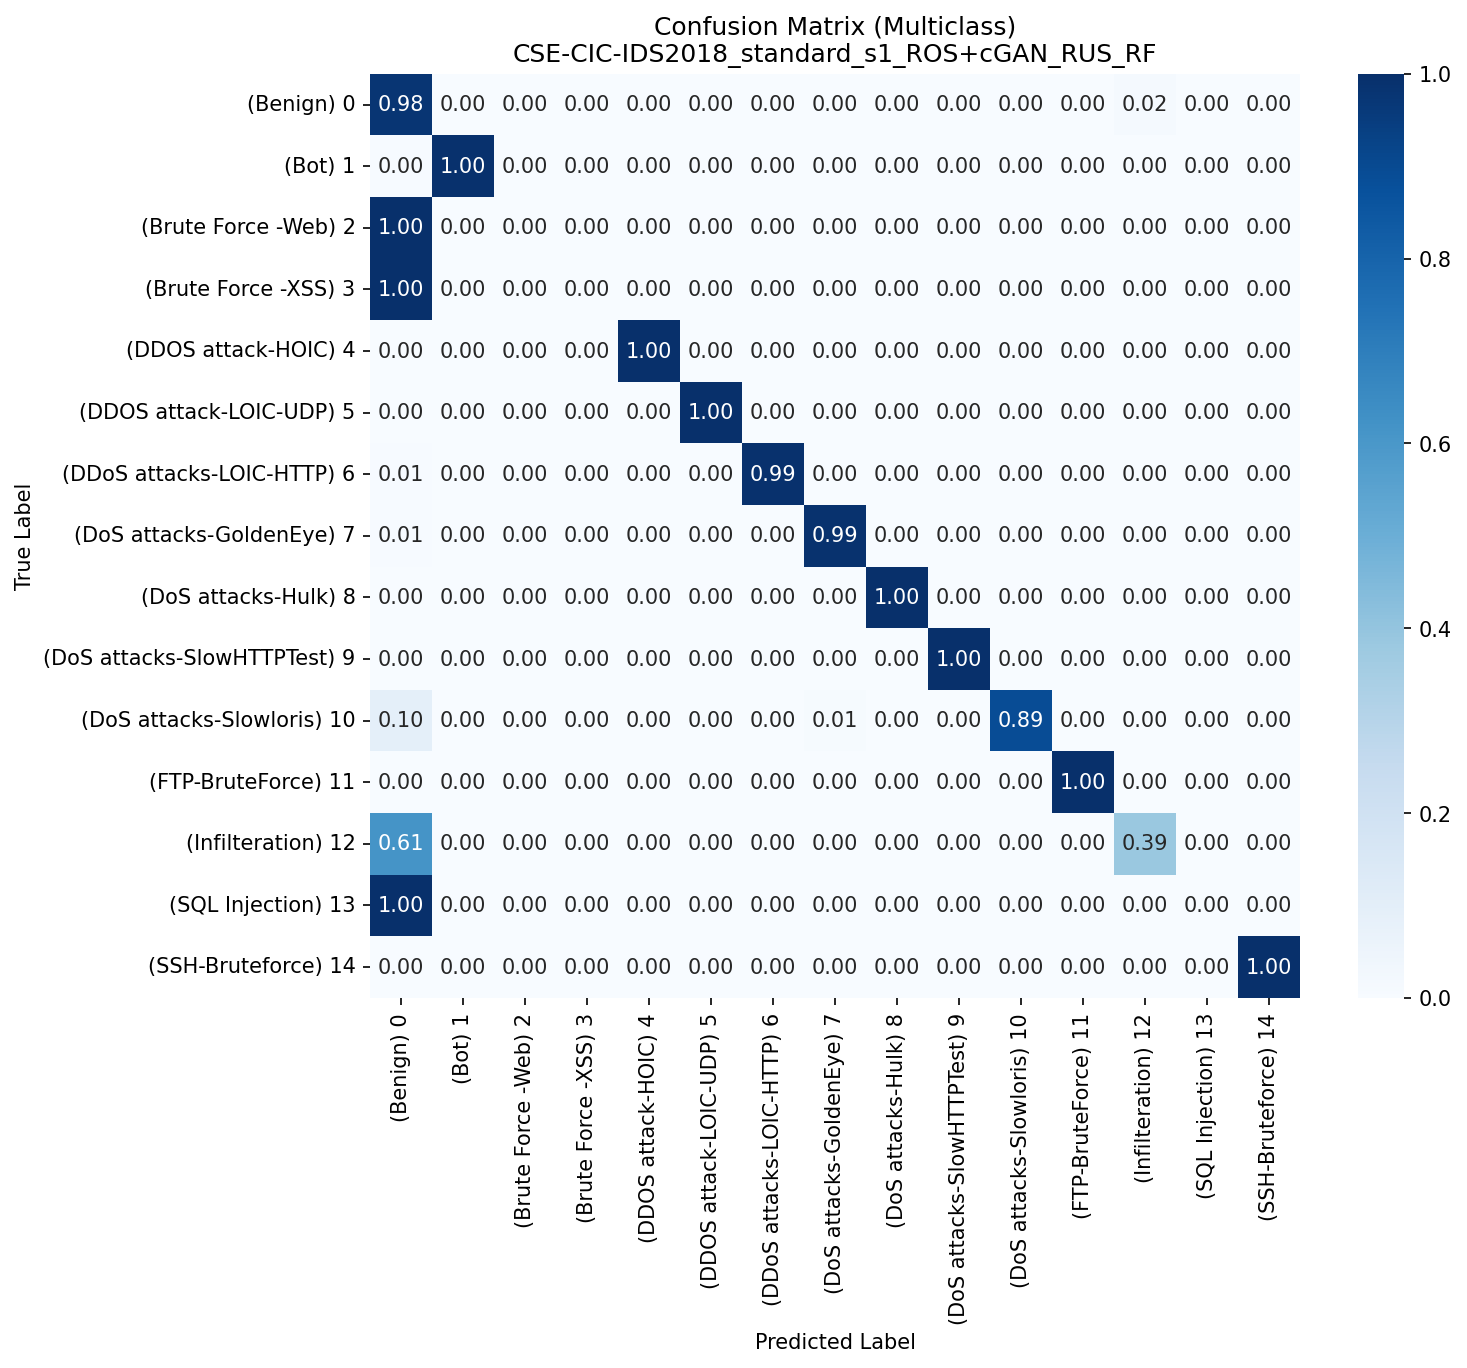

In [ ]:
## 绘制混淆矩阵图形 ##

np.set_printoptions(precision=2, suppress=True)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# print(f"[{datetime.now().strftime('%x %X')}] normalized confusion matrix: \n{cm_normalized}")

## Label 特征的数值化编码
label_mapping = {
    "Benign": 0,
    "Bot": 1,
    "Brute Force -Web": 2,
    "Brute Force -XSS": 3,
    "DDOS attack-HOIC": 4,
    "DDOS attack-LOIC-UDP": 5,
    "DDoS attacks-LOIC-HTTP": 6,
    "DoS attacks-GoldenEye": 7,
    "DoS attacks-Hulk": 8,
    "DoS attacks-SlowHTTPTest": 9,
    "DoS attacks-Slowloris": 10,
    "FTP-BruteForce": 11,
    "Infilteration": 12,
    "SQL Injection": 13,
    "SSH-Bruteforce": 14
}
labels = [f"({k}) {v}" for k, v in sorted(label_mapping.items(), key=lambda x: x[1])]
print(f"[{datetime.now().strftime('%x %X')}] labels: {labels}")

# 绘制混淆矩阵
plt.figure(figsize=(10, 8), dpi=150)
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title(f"Confusion Matrix (Multiclass)\n{model_file.stem}")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
# 保存图片
plt.savefig(model_file.with_name(model_file.stem + '_confusion_matrix.png'), bbox_inches='tight')
# 显示图片
plt.show()

In [ ]:
## 输出混淆矩阵文本 ##
report_text_cm = (
    f"[{datetime.now().strftime('%x %X')}] ================= Confusion Matrix =================\n"
)

col_width = 7  # 保证宽度对齐

report_text_cm += " " * 24 + "".join([name[name.index(")")+2:].ljust(col_width) for name in labels]) + "\n"
for i, row in enumerate(cm_normalized):
    row_name = labels[i][:20].ljust(24)
    row_vals = "".join([
        ("-----".ljust(col_width) if val < 1e-4 else f"{val:.3f}".ljust(col_width))
        for val in row])
    report_text_cm += row_name + row_vals + "\n"

print(report_text_cm)

[04/20/25 21:21:42] ================= Confusion Matrix =================
                        0      1      2      3      4      5      6      7      8      9      10     11     12     13     14     
(Benign) 0              0.979  0.000  -----  -----  -----  -----  0.001  -----  0.000  -----  -----  -----  0.019  -----  -----  
(Bot) 1                 0.005  0.995  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  
(Brute Force -Web) 2    1.000  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  
(Brute Force -XSS) 3    1.000  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  
(DDOS attack-HOIC) 4    -----  -----  -----  -----  1.000  -----  -----  -----  -----  -----  -----  -----  -----  -----  -----  
(DDOS attack-LOIC-UD    -----  -----  -----  -----  -----  1.000  -----  -----  -----  -----  -----  -----  -----  -----  -----  
(DDoS attacks-LOI

In [ ]:
## 多分类报告 ##

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

report_multiclass = classification_report(y_true, y_pred, target_names=labels, zero_division=0, digits=6)
# zero_division 是防止除零告警, 如果有某个类别完全没有判断正确的样本，就会出现除零告警

# Macro 平均 (不考虑不同类别的样本数量差异)
acc_macro = precision_score(y_true, y_pred, average='macro')
rec_macro = recall_score(y_true, y_pred, average='macro', zero_division=0)
f1_macro = f1_score(y_true, y_pred, average='macro', zero_division=0)

# Weighted 平均 (考虑不同类别的样本数量差异)
acc_weighted = precision_score(y_true, y_pred, average='weighted')
rec_weighted = recall_score(y_true, y_pred, average='weighted', zero_division=0)
f1_weighted = f1_score(y_true, y_pred, average='weighted', zero_division=0)

acc = accuracy_score(y_true, y_pred)

report_text_multiclass =  (
    f"[{datetime.now().strftime('%x %X')}] ================= Multiclass Report =================\n"
    + report_multiclass + "\n"
    + f"📊 Macro average\n"
    + f"    Precision: {acc_macro:.6f}\n"
    + f"    Recall:    {rec_macro:.6f}\n"
    + f"    F1 Score:  {f1_macro:.6f}\n\n"
    + f"📊 Weighted average\n"
    + f"    Precision: {acc_weighted:.6f}\n"
    + f"    Recall:    {rec_weighted:.6f}\n"
    + f"    F1 Score:  {f1_weighted:.6f}\n\n"
    + f"🎯 Accuracy: {acc:.6f}\n\n"
)
print(report_text_multiclass)

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


[04/20/25 21:21:43] ================= Multiclass Report =================
                              precision    recall  f1-score   support

                  (Benign) 0   0.948862  0.978960  0.963676    200000
                     (Bot) 1   0.998178  0.995318  0.996746     28619
        (Brute Force -Web) 2   0.000000  0.000000  0.000000        61
        (Brute Force -XSS) 3   0.000000  0.000000  0.000000        23
        (DDOS attack-HOIC) 4   0.999796  1.000000  0.999898     68602
    (DDOS attack-LOIC-UDP) 5   0.940217  1.000000  0.969188       173
  (DDoS attacks-LOIC-HTTP) 6   0.997353  0.994151  0.995750     57619
   (DoS attacks-GoldenEye) 7   0.996370  0.991809  0.994084      4151
        (DoS attacks-Hulk) 8   0.998595  1.000000  0.999297     46191
(DoS attacks-SlowHTTPTest) 9   0.999929  1.000000  0.999964     13989
  (DoS attacks-Slowloris) 10   0.983984  0.894449  0.937083      1099
         (FTP-BruteForce) 11   0.999741  1.000000  0.999871     19336
          (Infi

In [ ]:
## 二分类报告 ##

# 将多分类标签映射为二分类：
normal_class_label = 0
y_true_bin = np.where(y_true == normal_class_label, 0, 1)  # (判断条件, 条件为True时的值, 条件为False时的值)
y_pred_bin = np.where(y_pred == normal_class_label, 0, 1)

report_binary = classification_report(y_true_bin, y_pred_bin, zero_division=0, digits=6)

# 计算常用二分类指标
acc_bin = accuracy_score(y_true_bin, y_pred_bin)
f1_bin = f1_score(y_true_bin, y_pred_bin)
pre_bin = precision_score(y_true_bin, y_pred_bin)
rec_bin = recall_score(y_true_bin, y_pred_bin)

# 🧮 计算 FPR（误报率） = FP / (FP + TN)
cm_bin = confusion_matrix(y_true_bin, y_pred_bin)
if cm_bin.shape == (2, 2):
    tn, fp, fn, tp = cm_bin.ravel()
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0.0
else:
    print(f"[{datetime.now().strftime('%x %X')}] ⚠️ confusion matrix shape is not (2, 2)")
    raise Exception("confusion matrix shape is not (2, 2)")

report_text_binary = (
    f"[{datetime.now().strftime('%x %X')}] ================= Binary Report (Normal vs Attack) =================\n"
    + report_binary + "\n"
    + f"🎯 Accuracy       : {acc_bin:.6f}\n"
    + f"✅ Precision      : {pre_bin:.6f}\n"
    + f"🔁 Recall / DR    : {rec_bin:.6f}\n"
    + f"🎯 F1 Score       : {f1_bin:.6f}\n"
    + f"🚨 FPR (误报率)    : {fpr:.6f}\n"
)

print(report_text_binary)

[04/20/25 21:21:43] ================= Binary Report (Normal vs Attack) =================
              precision    recall  f1-score   support

           0   0.948862  0.978960  0.963676    200000
           1   0.984319  0.961586  0.972820    274694

    accuracy                       0.968906    474694
   macro avg   0.966591  0.970273  0.968248    474694
weighted avg   0.969380  0.968906  0.968967    474694

🎯 Accuracy       : 0.968906
✅ Precision      : 0.984319
🔁 Recall / DR    : 0.961586
🎯 F1 Score       : 0.972820
🚨 FPR (误报率)    : 0.021040



In [ ]:
## 保存报告
report_file = model_file.with_name(model_file.stem + '_report.txt')

report_text = report_dataset + '\n' + report_text_cm + '\n' + report_text_multiclass + '\n' + report_text_binary

with open(report_file, 'w') as f:
    f.write(report_text)
    print(f"[{datetime.now().strftime('%x %X')}] report saved to {report_file}")

[04/20/25 21:21:43] report saved to /content/drive/MyDrive/NYIT/870/model_result/CSE-CIC-IDS2018/CSE-CIC-IDS2018_standard_s1_ROS+cGAN_RUS_RF_report.txt
